In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


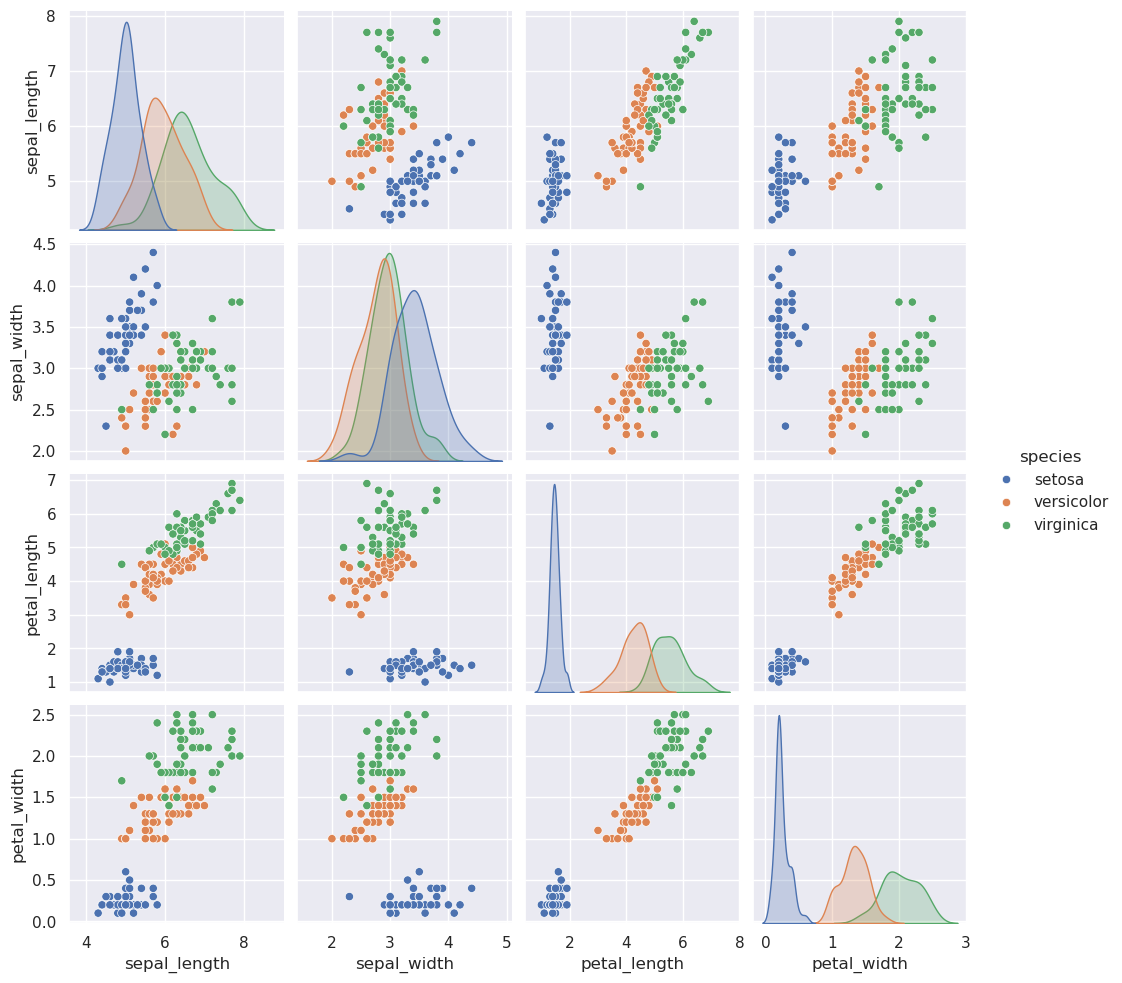

In [4]:
sns.set()
sns.pairplot(iris, hue = 'species')
plt.show()

In [5]:
X = iris[['sepal_width', 'petal_length']].values

In [6]:
Y = iris['species'].values

In [7]:
X_train = X[:90]
Y_train = Y[:90]
X_test = X[90:]
Y_test = Y[90:]

In [8]:
#pb est qu on a pris les observations dans l ordre et donc 
#qu on aurait les memes especes sur un grand nombre d obs

In [9]:
from sklearn.utils import shuffle

In [10]:
X,Y = shuffle(X,Y)

In [11]:
X_train = X[:90]
Y_train = Y[:90]
X_test = X[90:]
Y_test = Y[90:]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.score(X_train, Y_train)

0.9777777777777777

In [14]:
#si le score c est la proportion de bonnes reponses
#score = somme(1{y^=y})/n
#et le risque c'est l'esperance (empirique) de la fonction de perte entre notre predicteur et
#le vrai label
#1-risque = score (version emp)

In [15]:
list_score = []
list_bis = []
for i in range(1,21) :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    list_score.append(knn.score(X_train, Y_train))
    list_bis.append(knn.score(X_test, Y_test))

In [18]:
#score_diff = score_diff.set_axis(['score'], axis=1)

In [19]:
#score_diff.plot(y = 'score', use_index = True)


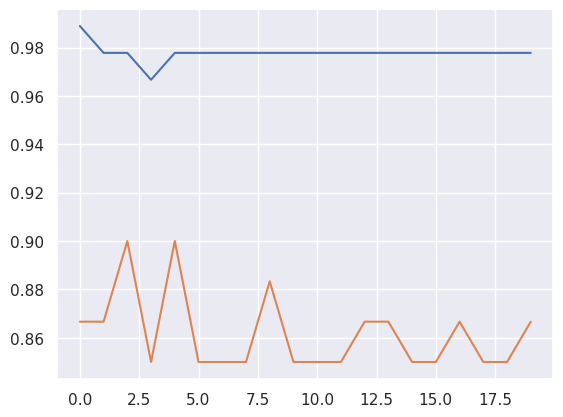

In [20]:
plt.plot(list_score)
plt.plot(list_bis)
plt.show()

In [21]:
#Q16 
#je pense que 3 est pas mal mais a voir

In [22]:
def best_knn_score(X,Y) :
    X,Y = shuffle(X,Y)
    X_train = X[:90]
    Y_train = Y[:90]
    X_test = X[90:]
    Y_test = Y[90:]
    list_score = []
    list_bis = []
    for i in range(1,21) :
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        list_score.append(knn.score(X_train, Y_train))
        list_bis.append(knn.score(X_test, Y_test))
    valeur_max = max(list_bis)
    return valeur_max

In [23]:
for i in range (1,10) :
    print(best_knn_score(X,Y))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.95
0.95
0.9666666666666667
0.9833333333333333


In [24]:
#le score augmente a chaque fois parce que le predicteur finit par apprendre le jeu de 
#donnees de test

In [25]:
from statistics import mean
def best_knn_score_avg(X,Y) :
    liste_ter = []
    for i in range (1,101) :
        a = best_knn_score(X,Y)
        liste_ter.append(a)
    la_moyenne = mean(liste_ter)
    return la_moyenne

In [26]:
best_knn_score_avg(X,Y)

0.9633333333333333

In [ ]:
#Q19

In [32]:
X_ = X.copy()

In [40]:
X_[:,1]

array([6.3, 6.6, 5.6, 1.3, 5.2, 5.8, 4.2, 4.2, 1.4, 1.2, 5.1, 5.1, 1.3,
       1.3, 1.4, 4.4, 4. , 1.4, 1.6, 4.9, 1.5, 1.4, 1.4, 1.4, 4.8, 4.1,
       4.6, 1.5, 1.5, 4.4, 1.4, 5.1, 4.9, 3.5, 4.2, 4.3, 1.7, 1.5, 4.5,
       1.4, 4.8, 1.6, 1.5, 4.5, 4.8, 4.4, 5.3, 5.9, 1.3, 6.4, 1. , 5.3,
       5.8, 1.3, 4.6, 5.5, 5.7, 1.4, 6.1, 3.3, 5.7, 6. , 4.1, 6.1, 5.6,
       4.7, 5.4, 1.5, 3.3, 1.6, 1.5, 1.7, 6. , 1.7, 1.6, 4.1, 1.4, 4.7,
       4.7, 1.7, 3.7, 1.5, 4.8, 4.5, 5.6, 6.9, 3.5, 5.5, 1.5, 1.6, 1.9,
       1.5, 3. , 5.1, 1.3, 4.7, 4. , 1.6, 5.9, 5.6, 4.9, 1.5, 5.8, 5.2,
       1.3, 5.1, 5. , 4.5, 5.1, 5.7, 1.4, 1.5, 4.5, 5. , 4.3, 5.5, 1.4,
       1.9, 3.9, 4.4, 5.6, 4. , 1.1, 1.5, 6.7, 3.9, 3.6, 5. , 5.1, 3.8,
       5.4, 1.2, 6.7, 4. , 4.6, 1.4, 4.2, 4.5, 3.9, 1.6, 4.5, 4.9, 6.1,
       4.5, 5. , 4.7, 4. , 5.1, 5.6, 4.9])

In [43]:
X_[:,1] = X_[:,1]*10

In [45]:
best_knn_score_avg(X_,Y)

0.9595

In [46]:
#On remarque que la prédiction est moins bonne (en moyenne)

In [47]:
from sklearn import preprocessing

In [51]:
X_scaled = preprocessing.scale(X)

In [52]:
best_knn_score(X_, Y)

0.9333333333333333

In [54]:
best_knn_score_avg(X_, Y)

0.9535

### On remarque que la prédiction n'est pas meilleure

In [56]:
X_tot = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [57]:
best_knn_score(X_tot, Y)

0.35

In [58]:
best_knn_score_avg(X_tot, Y)

0.3948333333333333

La moyenne des prédictions n'est pas du tout meilleure non plus. 